In [1]:
# Import the packages
import os
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import earthpy as et

In [2]:
# Creating a home directory
home_dir = os.path.join(et.io.HOME, "earth-analytics", "data", "earthpy-downloads")
if not os.path.isdir(home_dir):
    os.makedirs(home_dir)

# Set working directory
os.chdir(os.path.join(et.io.HOME, "earth-analytics", "data", "earthpy-downloads"))

## Challenge 1: Open a Text File

In [3]:
et.data.get_data(
    url="https://opendata.arcgis.com/datasets/175425c25d8849b58feb89483ef02961_1.csv"
)

'C:\\Users\\Gabriel\\earth-analytics\\data\\earthpy-downloads\\OSMP_Climbing_Formations.csv'

In [4]:
boulder_climbing = pd.read_csv("OSMP_Climbing_Formations.csv")
boulder_climbing.head()

,X,Y,OBJECTID,ID,FEATURE,ROUTES,HCA,OWNER,SeasonalClosure,AreaAccess,UseRating,AKA,ClosureActive,PERMITREQ,FormationType,Display,FixedHardwarePermit
0,-105.294224,40.005020,1,1.0,Pumpkin Rock,4.0,No,OSMP,N,Flagstaff,2.50,First Areas,N,No,Boulder,Yes,NaN
1,-105.287861,39.975276,2,2.0,Veranda,2.0,No,OSMP,N,NCAR,0.00,NaN,N,No,Wall,Yes,NaN
2,-105.293598,39.995411,3,3.0,Third Pinnacle,7.0,No,OSMP,N,Gregory Canyon,1.25,NaN,N,No,Wall,Yes,NaN
3,-105.294391,39.986358,4,4.0,The Fin,1.0,No,OSMP,Y,Chautauqua,1.17,NaN,Y,No,Wall,Yes,NaN
4,-105.292811,39.995952,5,6.0,First Pinnacle,23.0,No,OSMP,N,Gregory Canyon,2.20,NaN,N,No,Wall,Yes,NaN


### How to Convert x,y Coordinate Data To A GeoDataFrame (or shapefile) - Spatial Data in Tabular Formats

###  Challenge 2: Create a Spatial GeoDataframe From a DataFrame
- function ``gpd.points_from_xy()``

[Text(0.5, 1.0, 'Climbing Coordinates - Boulder, CO')]

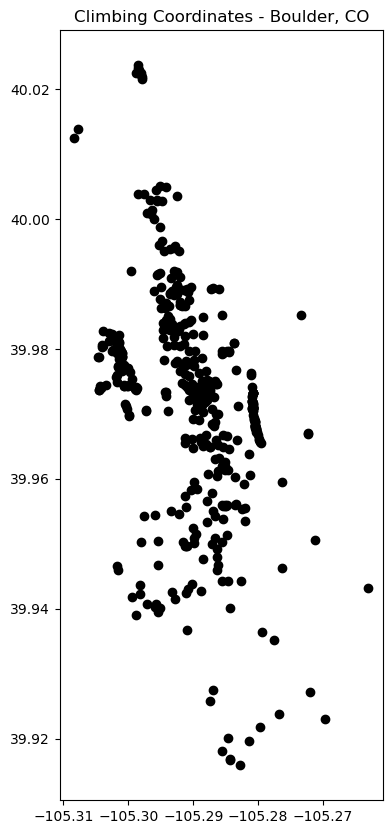

In [5]:
# Convert columns x,y using the GEOPANDAS points_from_xy() function
coordinates = gpd.points_from_xy(boulder_climbing.X, boulder_climbing.Y)

# Create the GeoDataFrame
boulder_climbing_gdf = gpd.GeoDataFrame(data=boulder_climbing, geometry=coordinates)

fig, ax = plt.subplots(figsize=(16, 10))
boulder_climbing_gdf.plot(ax=ax, color="k")
ax.set(title="Climbing Coordinates - Boulder, CO")

In [6]:
# Export the data into shapefile
boulder_climbing_gdf.to_file("boulder_climbing.shp")

C:\Users\Gabriel\AppData\Local\Temp\ipykernel_27272\94245169.py:2: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  boulder_climbing_gdf.to_file("boulder_climbing.shp")
c:\Users\Gabriel\miniconda3\envs\pangeo\Lib\site-packages\pyogrio\raw.py:698: UserWarning: 'crs' was not provided.  The output dataset will not have projection information defined and may not be usable in other systems.
  warnings.warn(
c:\Users\Gabriel\miniconda3\envs\pangeo\Lib\site-packages\pyogrio\raw.py:709: RuntimeWarning: Normalized/laundered field name: 'SeasonalClosure' to 'SeasonalCl'
  ogr_write(
c:\Users\Gabriel\miniconda3\envs\pangeo\Lib\site-packages\pyogrio\raw.py:709: RuntimeWarning: Normalized/laundered field name: 'ClosureActive' to 'ClosureAct'
  ogr_write(
c:\Users\Gabriel\miniconda3\envs\pangeo\Lib\site-packages\pyogrio\raw.py:709: RuntimeWarning: Normalized/laundered field name: 'FormationType' to 'FormationT'
  ogr_write(
c:\Users\Gabriel\minico

###  Challenge 3: Create a Base Map

- Download the data and load into a gpd object

In [7]:
# Get the data
et.data.get_data(
    url="https://opendata.arcgis.com/datasets/955e7a0f52474b60a9866950daf10acb_0.geojson"
)

'C:\\Users\\Gabriel\\earth-analytics\\data\\earthpy-downloads\\City_of_Boulder_City_Limits.geojson'

In [8]:
# Load the data
boulder_boundary = gpd.read_file("City_of_Boulder_City_Limits.geojson")
boulder_boundary.head()

,OBJECTID,TYPE,ShapeSTArea,ShapeSTLength,geometry
0,38,City,7.137130e+07,45959.337125,"POLYGON Z ((-105.20685 40.07559 0, -105.20685 ..."
1,39,City,4.073072e+07,64816.989082,"POLYGON Z ((-105.1787 40.06914 0, -105.17836 4..."
2,40,City,8.103168e+04,1661.732555,"POLYGON Z ((-105.21128 40.01726 0, -105.21138 ..."
3,41,City,2.092505e+07,34856.338250,"POLYGON Z ((-105.26349 40.0802 0, -105.26687 4..."
4,56,City,6.460686e+08,308305.279520,"POLYGON Z ((-105.29508 40.04174 0, -105.29515 ..."


[Text(0.5, 1.0, 'City Limits - Boulder - CO')]

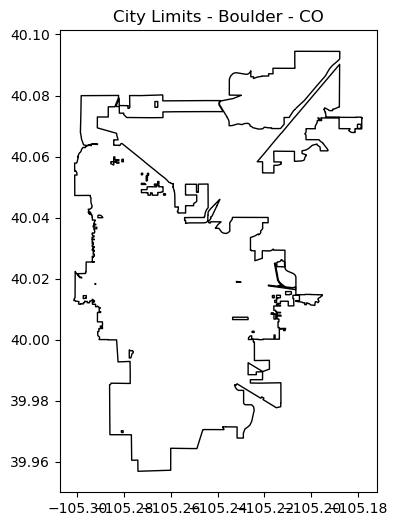

In [9]:
fig, ax = plt.subplots(figsize=(18, 6))
boulder_boundary.plot(ax=ax, color="w", edgecolor="k")
ax.set(title="City Limits - Boulder - CO")

### Challenge 4: Plot Two GeoDataFrames Together in the Same Figure

C:\Users\Gabriel\AppData\Local\Temp\ipykernel_27272\2651396281.py:8: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


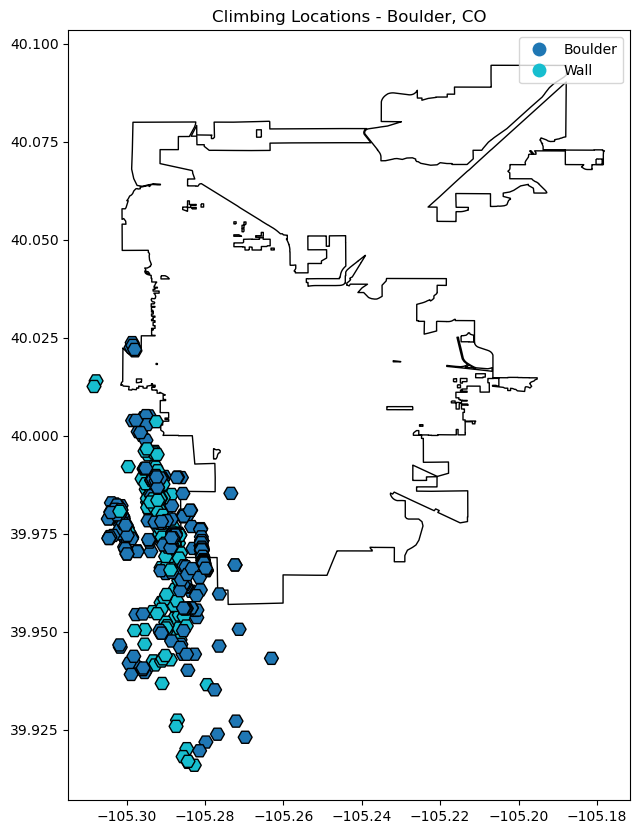

In [23]:
# Create the plot objetct
fig, ax = plt.subplots(figsize=(10, 10))
boulder_boundary.plot(ax=ax, color="w", edgecolor="k")
boulder_climbing_gdf.plot(
    column="FormationType",
    ax=ax,
    edgecolor="k",
    markersize=100,
    marker="H",
    legend=True,
)
ax.set(title="Climbing Locations - Boulder, CO")
fig.show()

### Interactive Spatial Maps Using Folium


In [27]:
import folium

# Define coordinates of where we want to center our map
center_coords = [40.015, -105.2705]

# Create the map
my_map = folium.Map(location=center_coords, zoom_start=12)

for lat, long in zip(boulder_climbing_gdf.geometry.y, boulder_climbing_gdf.geometry.x):
    folium.Marker(location=[lat, long]).add_to(my_map)

my_map

### BONUS Challenge: Clip Climbing Formations to the City of Boulder
In the vector notebook, you learned how to clip spatial data. In your code, do the following:

1. Clip the climbing formations to the boundary of the city of Boulder.
2. Plot the clipped points on top of the city boundary.

C:\Users\Gabriel\AppData\Local\Temp\ipykernel_27272\3639540131.py:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  city_climbing_locations = gpd.clip(boulder_climbing_gdf, boulder_boundary)


Text(0.5, 1.0, 'Climbing Locations Within Boulder City Limits')

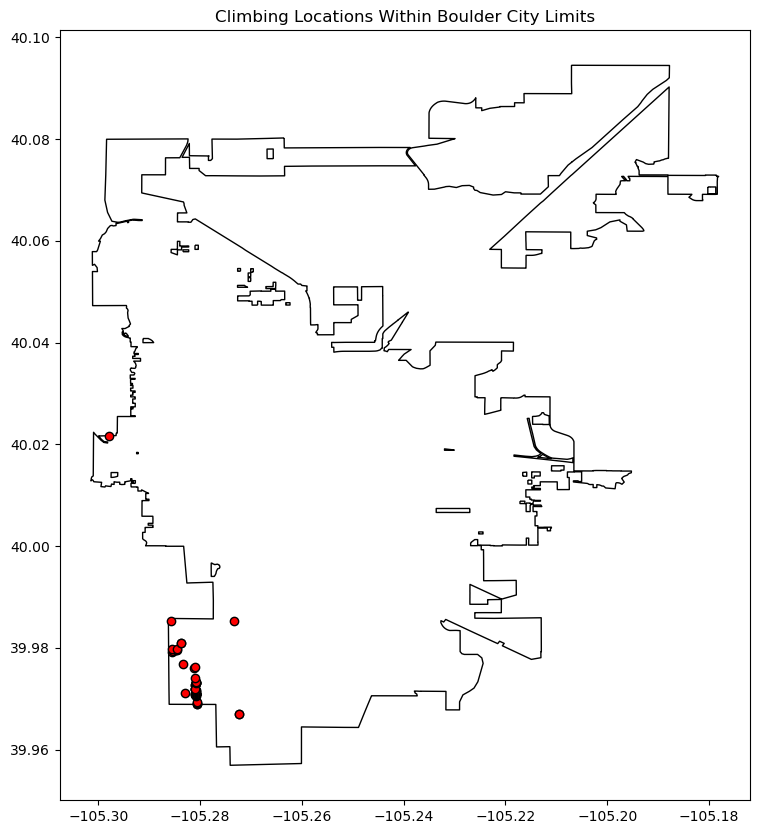

In [34]:
city_climbing_locations = gpd.clip(boulder_climbing_gdf, boulder_boundary)

fig, ax = plt.subplots(figsize=(10, 10))
boulder_boundary.plot(ax=ax, color="w", edgecolor="k")
city_climbing_locations.plot(ax=ax, color="r", edgecolor="k")
ax.set_title("Climbing Locations Within Boulder City Limits")